In [2]:
# 导入必要的库
import os

import random

from __future__ import absolute_import, division, print_function, unicode_literals
import sys
print("Python executable:", sys.executable)
import tensorflow as tf
tf.config.experimental.enable_op_determinism()

import tensorflow as tf; tf.config.list_physical_devices('GPU')
from tensorflow.keras import datasets, layers, models, Model
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import cv2
from matplotlib import pyplot
import h5py
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, BatchNormalization, Activation, GlobalAveragePooling2D, Dropout, Dense

Python executable: E:\Anaconda3\python.exe
TF 版本: 2.18.0
CUDA 版本: None
cuDNN 版本: None
可用 GPU 设备: []
OpenCV 版本: 4.11.0


In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0


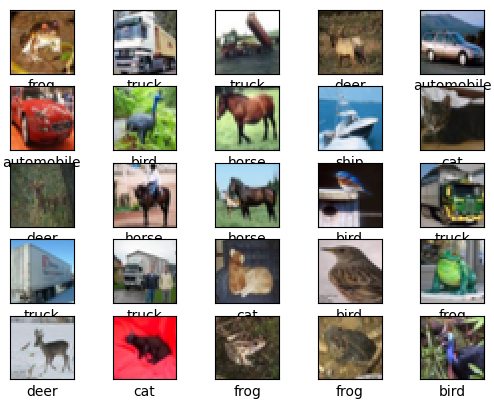

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

for i in range(25):
    plt.subplot(5, 5, i + 1)  
    plt.xticks([])  
    plt.yticks([]) 
    plt.grid(False)  #
    plt.imshow(train_images[i])  
    plt.xlabel(class_names[train_labels[i][0]])  

plt.show() 

In [4]:
def create_lightweight_cnn(input_shape=(32,32,3), num_classes=10):

    seed_value = 0
    random.seed(seed_value)


    np.random.seed(seed_value)


    tf.random.set_seed(seed_value)


    tf.config.experimental.enable_op_determinism()
    model = Sequential()
    
    # Block 1
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    # Block 2
    model.add(DepthwiseConv2D((3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(64, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    # Downsampling
    model.add(Conv2D(64, (3, 3), strides=2, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    # Block 3
    model.add(DepthwiseConv2D((3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(128, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
   # Downsampling
    model.add(Conv2D(128, (3, 3), strides=2, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    # Block 4
    model.add(DepthwiseConv2D((3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(256, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    # Global average pooling + Dropout + fully connected classifier
    model.add(GlobalAveragePooling2D())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

model = create_lightweight_cnn()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


E:\Anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
#Pour afficher l'architecture du modele CNN 
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ depthwise_conv2d (DepthwiseConv2D)   │ (None, 32, 32, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ depthwise_conv2d_1 (DepthwiseConv2D) │ (None, 16, 16, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 237,258 (926.79 KB)

 Trainable params: 235,466 (919.79 KB)

 Non-trainable params: 1,792 (7.00 KB)

In [16]:
model.compile(optimizer='adam',  
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy']) 

history = model.fit(train_images, train_labels,
                    epochs=50,  
                    validation_data=(test_images, test_labels))

model.save(r"C:\Users\Clay\Desktop\MN\Biometric\TP-CNN\all model\lite01.h5")

 

Epoch 1/50


KeyboardInterrupt: 

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq\\backend\\cython\\checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt: 


  96/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 34ms/step - accuracy: 0.9822 - loss: 0.0514

KeyboardInterrupt: 

In [3]:
model=load_model(r"C:\Users\Clay\Desktop\MN\Biometric\TP-CNN\all model\lite01.h5")

In [4]:
train_acc = history.history['accuracy'][-1]
test_acc  = history.history['val_accuracy'][-1]

plt.plot(history.history['accuracy'],
         label=f"Train_accuracy (ep50={train_acc:.4f})")
plt.plot(history.history['val_accuracy'],
         label=f"Test_accuracy (ep50={test_acc:.4f})")  
plt.xlabel('Epoch')  
plt.ylabel('Accuracy') 
plt.ylim([0.5, 1]) 
plt.title('Lite01 Accuracy 50Epoch') 
plt.legend(loc='lower right')  

plt.show() 

NameError: name 'history' is not defined

In [15]:
import pandas as pd

history_dict = history.history

df = pd.DataFrame({
    "Train_accuracy": history_dict["accuracy"],
    "Train_loss": history_dict["loss"],
    "Test_accuracy": history_dict["val_accuracy"],
    "Test_loss": history_dict["val_loss"]
})

excel_filename = "training_history.xlsx"
df.to_excel(excel_filename, index=False)

In [5]:
print(test_acc)

NameError: name 'test_acc' is not defined

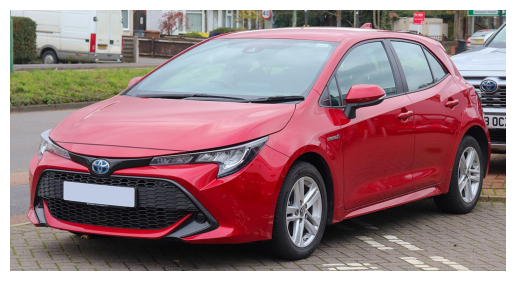

In [10]:
img = cv2.imread(r"C:\Users\Clay\Desktop\MN\Biometric\TP-CNN\car.jpg") 

img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_cvt)
plt.axis('off') 
plt.show()


In [11]:
img = cv2.resize(img_cvt, (32,32))
img = img.astype('float32')
img= img / 255.0
imgs = tf.expand_dims(
    img,
    axis=0,
    name=None
)
model.predict(imgs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


array([[4.6943187e-12, 9.9991882e-01, 1.7133864e-12, 8.5546754e-18,
        2.7684834e-12, 7.6757802e-22, 2.4953339e-10, 1.1108130e-11,
        1.8953687e-10, 8.1132814e-05]], dtype=float32)

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


C:\Users\MI\AppData\Roaming\Python\Python312\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(1, 32, 32, 3))
  warnings.warn(msg)


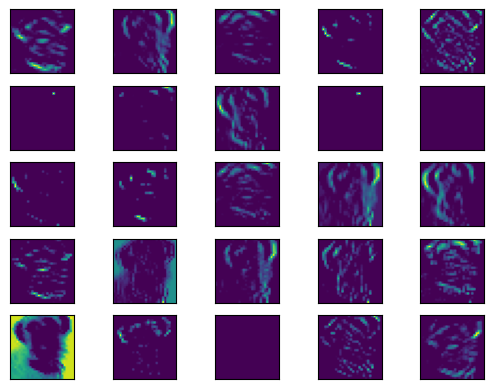

In [45]:
i=0

square = 5
ix = 1

model2 = Model(inputs=model.inputs, outputs=model.layers[i].output)
 
model2.summary()

feature_maps = model2.predict(imgs)
    
for _ in range(square):
  for _ in range(square):
  
        ax = pyplot.subplot(square, square, ix)
        ax.set_xticks([])  
        ax.set_yticks([])  
        
        pyplot.imshow(feature_maps[0, :, :, ix-1])

        ix += 1

pyplot.show()
